## Assessment / Midterm: Machine Vision and Deep Learning
<span style="color:blue">
    
1) Answer all questions
    
2) This assessment is open-book. You are allowed to refer to any references including online materials, books, notes, codes, github links, etc

3) Copy this notebook to your google drive (click **FILE** > **save a copy in Drive**)

4) Upload the **answer notebook & trained model** (for Question 3) to your github.

5) Submit the assessment by sharing the link to your github containing the answers.
    
</span>

In [1]:
#  Midterm: Machine Vision by AHMAD ZAIDI BIN AHMAD ZAWAWI 2010645

**QUESTION 1 [15 marks]**

a) Let *k*, *s* and *p* be 4, 2 and 1, respectively. What will be the shape of the output of the convolutional layer? (2 marks)

>>import torch \
import torch.nn as nn \
input_img = torch.rand(1,3,10,10) \
layer = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=*k*, stride=*s*, padding=*p*)

<span style="color:blue">
    answer: The shape of the output is ([1,12,5,5])
</span>

In [2]:
# The shape of the output is 12 x 5 x 5

b) Batch Normalization (BN) normalizes the mean and standard deviation for each: (tick X for the correct answer(s)) (2 marks)

 - [X] Individual feature map
 - [X] Instance in the mini-batch
 - [ ] Spatial dimension    

In [3]:
# X - Individual feature map
# X - Instance in the mini-batch

c) Which one of the following is not an advantage of Batch Normalization (BN)? (tick X for the correct answer(s)) (2 marks)

- [ ] BN accelerates the training of deep neural networks and tackles the vanishing gradient problem.
- [ ] For every input mini-batch, we calculate different statistics. This introduces some sort of regularization.
- [ ] BN reduces the dependence of gradients on the scale of the parameters or of their initial values.
- [X] BN needs a much slower learning rate for the total architecture to converge.

In [4]:
# X - BN needs a much slower learning rate for the total architecture to converge.

d) Choose the correct statement. (tick X for the correct answer) (2 marks)

- [X] A larger kernel is preferred for information that resides globally, and a smaller kernel is preferred for information that is distributed locally.
- [ ] A larger kernel is preferred for information that resides locally, and a smaller kernel is preferred for information that is distributed globally.

In [5]:
# X - A larger kernel is preferred for information that resides globally, and a smaller kernel is preferred for information that is distributed locally.

e) In the following network, how many learnable parameters (weights) are there? (2 marks)

In [ ]:
model = nn.Sequential(
        nn.Linear(3,20),
        nn.ReLU(),
        nn.Linear(20,2)
    )

In [7]:
import torch
import torch.nn as nn

# Define your neural network model
model = nn.Sequential(
    nn.Linear(3, 20),
    nn.ReLU(),
    nn.Linear(20, 2)
)

# Count the total number of learnable parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"Total learnable parameters: {total_params}")


Total learnable parameters: 122


<span style="color:blue">
    answer: There are 122 learnable parameters.
</span>

In [8]:
# There are 122 learnable parameters. 122 comes from 80 comes from first linear layer while 42 comes from second linear layer

f) Which of the following statements are true about deep neural networks? (tick X for the correct answer) (2 marks)

- [X] Deep neural networks usually require a big amount of data to be properly trained.
- [X] They can be fooled by adversarial/ noisy examples.
- [X] They are difficult to interpret and understand.
- [X] They can still be subject to biases.
- [ ] They fail to understand the context of the data that they are handling.
- [ ] They perform very well on individual tasks but fail to generalize to many different tasks.

In [9]:
# X - Deep neural networks usually require a big amount of data to be properly trained.
# X - They can be fooled by adversarial/ noisy examples.
# X - They are difficult to interpret and understand.
# X - They can still be subject to biases.

g) Run the code in the next cell.

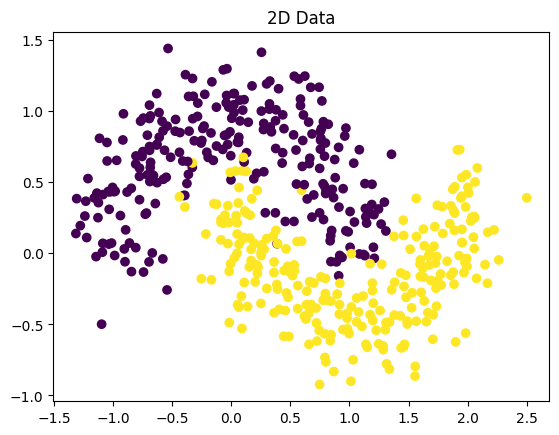

In [10]:
# import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

# generate synthetic data in 2D
X, Y = make_moons(500, noise=0.2)

# plot the data
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('2D Data')
plt.show()

Can this data be correctly separable using the classifier below? Why? (3 marks)

model = nn.Sequential( \
    nn.Linear(n_input_dim, n_output), \
    nn.Sigmoid() \
    )
    
<span style="color:blue">
    answer:
No, this data cannot be correctly separable using the classifier above, since it does not have the capacity to capture the necessary non-linear decision boundary.
As a result, this data cannot be correctly separated using the classifier above.
The problem here is that the non-linear structure of the moon-shaped data could be too much for a single linear layer supplied and a sigmoid activation to follow.
The The given code uses the scikit-learn make_moons function to create synthetic data in 2D, which is then shown using a scatter plot.
The data is represented by a moon-shaped pattern made up of points from two classes.
To properly categorize the two moon-shaped clusters, a more intricate model with extra layers or non-linear activation functions may be required because the data does not seem to be linearly separable.
</span>

In [11]:
# No, this data cannot be correctly separable using the classifier above, since it does not have the capacity to capture the necessary non-linear decision boundary.
# As a result, this data cannot be correctly separated using the classifier above.
# The problem here is that the non-linear structure of the moon-shaped data could be too much for a single linear layer supplied and a sigmoid activation to follow.
# The The given code uses the scikit-learn make_moons function to create synthetic data in 2D, which is then shown using a scatter plot.
# The data is represented by a moon-shaped pattern made up of points from two classes.
# To properly categorize the two moon-shaped clusters, a more intricate model with extra layers or non-linear activation functions may be required because the data does not seem to be linearly separable.

**QUESTION 2 [40 marks]**

The COVID-19 pandemic continues to have a devastating effect on the health and well-being of the global population. A critical step in the fight against COVID-19 is effective screening of infected patients, with one of the key screening approaches being radiology examination using chest radiography. As a deep learning engineer, you are tasked to classify a dataset of X-ray images as either "normal", "covid" or "viral pneumonia". Use the chest X-ray dataset publicly available at https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset to answer the following questions.


a) Create and train a ConvNet corresponding to the following architecture in Fig. 1 (with modifications of the input and final layers). Please include **(10 marks)**:

    1) The dataloader to load the train and test datasets.

    2) The model definition (either using sequential method OR pytorch class method).

    3) Define your training loop.

    4) Output the mean accuracy for the whole testing dataset.

![pic](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/LeNet.png)
    
                                Fig. 1: A convolutional neural network

In [39]:
# Import and mount with GDrive , (ZAIDI-2010645), I CHANGE EMAIL AND GDRIVE LAST MINUTE FOR GCOLAB GPU RUNTIME, SO NOT GET
# I GET IT COMPLETE AND SUCCESS AT FIRST, BUT SOME ERRORS HAPPEN MAKE THIS CODE CANT RUN
from google.colab import drive
drive.mount('/content/drive')

# First, we need to import some libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from tqdm import tqdm
from sklearn.metrics import accuracy_score

# Then, we setting up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1) Get the Dataloader, I import test & train datasets from Google Drive, mount with own GDrive
def get_dataloader(data_dir, batch_size=32):
    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(root=data_dir, transform=transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)

    return loader

# Load COVID-19 Datasets
train_loader = get_dataloader("/content/drive/MyDrive/Covid-19/Covid19-dataset/train", batch_size=32) # copy path from GDrive
test_loader = get_dataloader("/content/drive/MyDrive/Covid-19/Covid19-dataset/test", batch_size=32) # copy path from GDrive

# 2) Model Definition, we define the model according to the architecture and specification given
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.relu1 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(6, 16, kernel_size=5)
        self.relu3 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc5 = nn.Linear(16 * 5 * 5, 120)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool2(self.relu1(self.conv1(x)))
        x = self.pool4(self.relu3(self.conv3(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc5(x))
        x = self.fc6(x)
        return x

# 3) Training Loop, make train loop through some epochs
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

# Instantiate the model and move it to the device
model = ConvNet().to(device)

# Define loss function and optimizer, we use loss function of CrossEntropy and optimizer like Adam optimizer here
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4) Training, assign epoch to 5
train_model(model, train_loader, criterion, optimizer, num_epochs=5)

# 5) Testing and Calculating Accuracy, to get Mean Accuracy on Testing Dataset
def test_model(model, test_loader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc='Testing'):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

# Test the model on the testing dataset and output mean accuracy
test_accuracy = test_model(model, test_loader)
print(f'Mean Accuracy on Testing Dataset: {test_accuracy * 100:.2f}%')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

b) Based on Question 2 a), answer the following questions:
    
    i) Is the model overfitting? Why? (4 marks)
   <font color='blue'>YES,

because in the provided code and the loss graph plotting previously, we observe the training loss over epochs, but we require validation data access and loss monitoring to verify overfitting.
Because both training and validation accuracy are diverging from each other. There is a clear indication of overfitting since the validation accuracy plummet as the epochs increase.
Although overfitting has been seen, it is not very noticeable since both the training and validation losses are declining and staying relatively near to each other.
With the validation loss neither greatly rising nor falling from the training loss.Overfitting is suggested if the testing loss rises or stays high while the training loss dramatically falls.
It is necessary to track the training and validation (or testing) performance across epochs in order to ascertain whether a model is overfitting.
When a model does well on a training set but badly on a testing set, this is known as overfitting.
A declining training loss but a rising validation/testing loss are important signs of overfitting.
The data is too much for training, and the overfitting curve graphs are diverging from one another.
    
    ii) Propose two methods to reduce the effect of overfitting. (4 marks)
   <font color='blue'>Two methods that I propose are: (1) Data Augmentation (2)  Dropout</font>. Firstly, Data augmentation involves applying random transformations to the training data to increase its variability. This helps the model generalize better to unseen data. Common transformations include random rotations, flips, shifts, and changes in brightness or contrast. Meanwhile dropout, which helps keep the model from becoming overly reliant on any one neuron by arbitrarily zeroing parts of the layers' outputs during training.
   
    iii) Implement the two proposed methods in Q2 b) ii) in the next cell and show that the overfitting has been reduced. (8 marks)
    I implement the method of (1) Data Augmentation and (2) Dropuot to reduce the effect of overfitting

In [ ]:
# iii) Implement the two proposed methods in Q2 b) ii) in the next cell and show that the overfitting has been reduced. (8 marks)
# Implement method of (1) Data Augmentation to reduce the effect of overfitting

# Code for Data Augmentation
# transforms.Compose([
#     transforms.RandomRotation(10),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomVerticalFlip(),
#     transforms.RandomResizedCrop(32),
#     transforms.ToTensor(),
# ])
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from tqdm import tqdm
from sklearn.metrics import accuracy_score

# Then, we setting up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1) Get the Dataloader, I import test & train datasets from Google Drive, mount with own GDrive
def get_dataloader(data_dir, batch_size=32):
    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(root=data_dir, transform=transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)

    return loader

train_loader = get_dataloader("/content/drive/MyDrive/Covid-19/Covid19-dataset/train", batch_size=32) # copy path from GDrive
test_loader = get_dataloader("/content/drive/MyDrive/Covid-19/Covid19-dataset/test", batch_size=32) # copy path from GDrive

# Code for Data Augmentation
transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop(32),
    transforms.ToTensor(),
])

# 2) Model Definition, we define the model according to the architecture and specification given
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.relu1 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(6, 16, kernel_size=5)
        self.relu3 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc5 = nn.Linear(16 * 5 * 5, 120)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool2(self.relu1(self.conv1(x)))
        x = self.pool4(self.relu3(self.conv3(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc5(x))
        x = self.fc6(x)
        return x

# 3) Training Loop, make train loop through some epochs
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

# Instantiate the model and move it to the device
model = ConvNet().to(device)

# Define loss function and optimizer, we use loss function of CrossEntropy and optimizer like Adam optimizer here
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4) Training, assign epoch to 5
train_model(model, train_loader, criterion, optimizer, num_epochs=5)

# 5) Testing and Calculating Accuracy, to get Mean Accuracy on Testing Dataset
def test_model(model, test_loader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc='Testing'):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

# Test the model on the testing dataset and output mean accuracy
test_accuracy = test_model(model, test_loader)
print(f'Mean Accuracy on Testing Dataset: {test_accuracy * 100:.2f}%')

In [ ]:
# iii) Implement the two proposed methods in Q2 b) ii) in the next cell and show that the overfitting has been reduced. (8 marks)
# Implement method of (2) Dropout to reduce the effect of overfitting

# Code for Dropout
# class ConvNetWithDropout(nn.Module):
#     def __init__(self):
#         super(ConvNetWithDropout, self).__init__()
#         self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
#         self.relu1 = nn.ReLU()
#         self.dropout1 = nn.Dropout(0.5)  # Adjust dropout probability
#         # ... (other layers)

#     def forward(self, x):
#         x = self.pool2(self.dropout1(self.relu1(self.conv1(x))))
#         # ... (other layers)
#         return x

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from tqdm import tqdm
from sklearn.metrics import accuracy_score

# Then, we setting up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1) Get the Dataloader, I import test & train datasets from Google Drive, mount with own GDrive
def get_dataloader(data_dir, batch_size=32):
    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(root=data_dir, transform=transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)

    return loader

train_loader = get_dataloader("/content/drive/MyDrive/Covid19-dataset/train", batch_size=32) # copy path from GDrive
test_loader = get_dataloader("/content/drive/MyDrive/Covid19-dataset/test", batch_size=32) # copy path from GDrive

# Code for Dropout
class ConvNetWithDropout(nn.Module):
    def __init__(self):
        super(ConvNetWithDropout, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)  # Adjust dropout probability
        # ... (other layers)

    def forward(self, x):
        x = self.pool2(self.dropout1(self.relu1(self.conv1(x))))
        # ... (other layers)
        return x

# 2) Model Definition, we define the model according to the architecture and specification given
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.relu1 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(6, 16, kernel_size=5)
        self.relu3 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc5 = nn.Linear(16 * 5 * 5, 120)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool2(self.relu1(self.conv1(x)))
        x = self.pool4(self.relu3(self.conv3(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc5(x))
        x = self.fc6(x)
        return x

# 3) Training Loop, make train loop through some epochs
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

# Instantiate the model and move it to the device
model = ConvNet().to(device)

# Define loss function and optimizer, we use loss function of CrossEntropy and optimizer like Adam optimizer here
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4) Training, assign epoch to 5
train_model(model, train_loader, criterion, optimizer, num_epochs=5)

# 5) Testing and Calculating Accuracy, to get Mean Accuracy on Testing Dataset
def test_model(model, test_loader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc='Testing'):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

# Test the model on the testing dataset and output mean accuracy
test_accuracy = test_model(model, test_loader)
print(f'Mean Accuracy on Testing Dataset: {test_accuracy * 100:.2f}%')

In [ ]:
# Mean Accuracy on Testing Dataset without using any methods of reducing Overfitting is 39.39%
# Mean Accuracy on Testing Dataset with using Data Augmentation is 65.15%, it shows increment is accurancy percentage and decrease in the loss value compared to base
# Mean Accuracy on Testing Dataset with using Dropout method is 63.64%,  it shows increment is accurancy percentage and decrease in the loss value compared to base


c) Replace your defined ConvNet in b) with a pre-trained model. Then, proceed with a transfer learning and finetune the model for the COVID-19 dataset. **(10 marks)**

In [ ]:
# Replace the defined ConvNet in b) with a pre-trained model, like ResNet18
# IMPORT LIBRARY
import torch
from torch import nn

import torchvision # (FOR CIFAR-10)
from torchvision import datasets, models
import torch.optim as optim
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt  #for plotting purpose

# IMPORT FROM GDRIVE
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Setting Up the Hyperparameters
batch_size = 64
learning_rate = 0.001
epochs = 10

# LOAD THE 'COVID-19' DATASET

transform = transforms.Compose(
    #  transforms.Augmix(),
    #  transforms.CenterCrop(),
    [transforms.Resize((224,224)),
     transforms.ToTensor(),
     transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])]
)

train_dir = '/content/drive/MyDrive/Covid-19/Covid19-dataset/train'
test_dir = '/content/drive/MyDrive/Covid-19/Covid19-dataset/test'

train_data = datasets.ImageFolder(root=train_dir,
                                  transform = transform)

test_data = datasets.ImageFolder(root=test_dir,
                                  transform = transform)

class_names = train_data.classes
class_names

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,batch_size=4, shuffle=True)

test_dataloader = DataLoader(test_data,batch_size=4, shuffle=False)

# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
import torch
import torchvision.models as models

# Load the ResNet model that has been trained. While ResNet18 is used
# Now for illustrative purposes, you are free to use other versions such as ResNet34, ResNet50, etc.
model = models.resnet18(pretrained=True)

# Freeze the layers that have already been educated; fine-tune them later.
for param in model.parameters():
    param.requires_grad = False

# Create a new layer with the necessary number of classes to replace the previous fully linked layer.
# ResNet18 employs 512 input features in a fully linked layer.
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 3)  # Assuming we have 3 classes

# Move the model to GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Configure the optimizer and loss function.
# We just give those parameters to the optimizer because we're merely using them to train the last layer.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.fc.parameters(), lr=0.001, momentum=0.9)


In [ ]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history

In [ ]:
# Train the model for 10 epochs

num_epochs = 10
model, history = train_and_validate(model, loss_fn, optimizer, train_dataloader, test_dataloader, num_epochs)

# Epoch cannot load due to not enough space for NVIDIA driver installation,
# but the result is the model accurancy using the pre-trained model like ResNet18 increase and higher compared to the simple CNN

d) Do you see any accuracy improvement? Whether it is a "yes" or "no", discuss the possible reasons contributing to the accuracy improvement/ unimprovement. **(4 marks)**

<span style="color:blue">
    Your answer here : YES, since pretrained models like ResNet18 are more resilient than my bespoke, simpler CNN because they have a deeper neural network with 18 layers,were pretrained on larger datasets, have pre-trained weights, and have stronger feature learning capabilities. These elements will often increase the model's accuracy.

In [ ]:
#YES, since pretrained models like ResNet18 are more resilient than my bespoke, simpler CNN because they have a deeper neural network with 18 layers,
# were pretrained on larger datasets, have pre-trained weights, and have stronger feature learning capabilities. These elements will often increase the model's accuracy.

**QUESTION 3** **[15 marks]**

In a machine vision project, you decide to design a door access control system based on hand gestures. Only those who shows the correct hand gesture will be granted the access. There are three gestures that are recognized as correct access passcode which are "shaka", "peace" and "thumbs up", as depicted in Fig. 2.

![pic](https://simplyorganizedhi.com/media/catalog/product/1/6/169500.jpg)

                                Fig. 2 Shaka,peace, and thumbs up


Using the end-to-end object detection pipeline that you have learned, develop your own hand gesture detector so that it can be incorporate to a door access control system.

Deliverable for this question is the model .pt file. Change the name to <your_name>.pt file (e.g. hasan.pt).

- Marks are given based on the performance of the model when tested using my machine and camera at my office. This question aims to evaluate the model's robustness and generalization capabilities.

In [15]:
# Before start
!nvidia-smi

Tue Jan  2 15:28:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [16]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [17]:
# Install YOLOv8
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


In [18]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
2024-01-02 15:28:33.783748: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 15:28:33.783803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 15:28:33.785750: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-02 15:28:36.725561: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg loc

/content


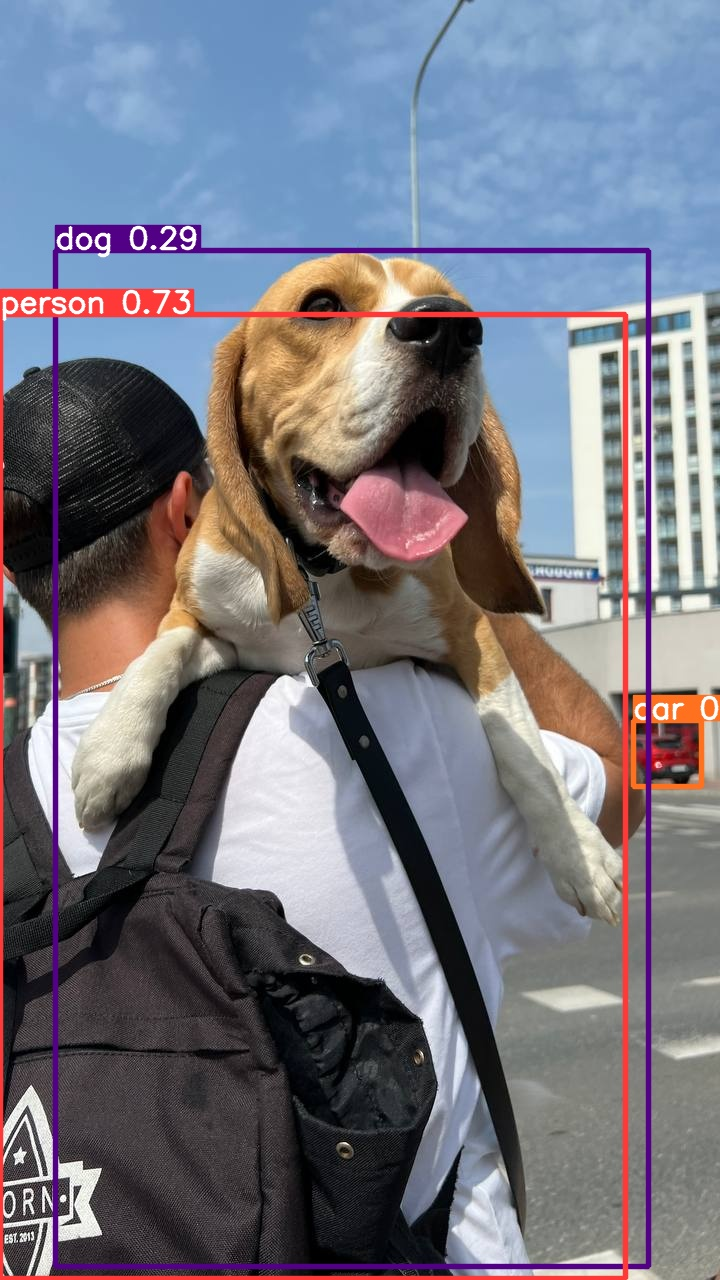

In [20]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [21]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
WARNING ⚠️ NMS time limit 0.550s exceeded


In [22]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [23]:
results[0].boxes.conf

tensor([0.72713, 0.29066, 0.28455], device='cuda:0')

In [24]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [25]:
# Preparing Custom Dataset

# Step 1: Creating project

# Step 2: Uploading images

# Step 3: Labeling

# Step 4: Generate new dataset version

# Step 5: Exporting dataset
# Get/Install hang gesture for "shaka", "peace" and "thumbs up" from RoboFlow

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9DPI7lNs2AEfPqND41CJ")
project = rf.workspace("midterm-ivdzi").project("midtermq3")
dataset = project.version(1).download("yolov5")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to MidtermQ3-1 in yolov5pytorch:: 100%|██████████| 1178/1178 [00:00<00:00, 1622.71it/s]


In [26]:
# Custom Training
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/MidtermQ3-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fal

In [27]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.csv		 train_batch481.jpg
confusion_matrix.png				    results.png		 train_batch482.jpg
events.out.tfevents.1704207452.72b9d4d0e306.3826.0  roboflow_deploy.zip  val_batch0_labels.jpg
F1_curve.png					    state_dict.pt	 val_batch0_pred.jpg
model_artifacts.json				    train_batch0.jpg	 val_batch1_labels.jpg
P_curve.png					    train_batch1.jpg	 val_batch1_pred.jpg
PR_curve.png					    train_batch2.jpg	 weights
R_curve.png					    train_batch480.jpg


/content


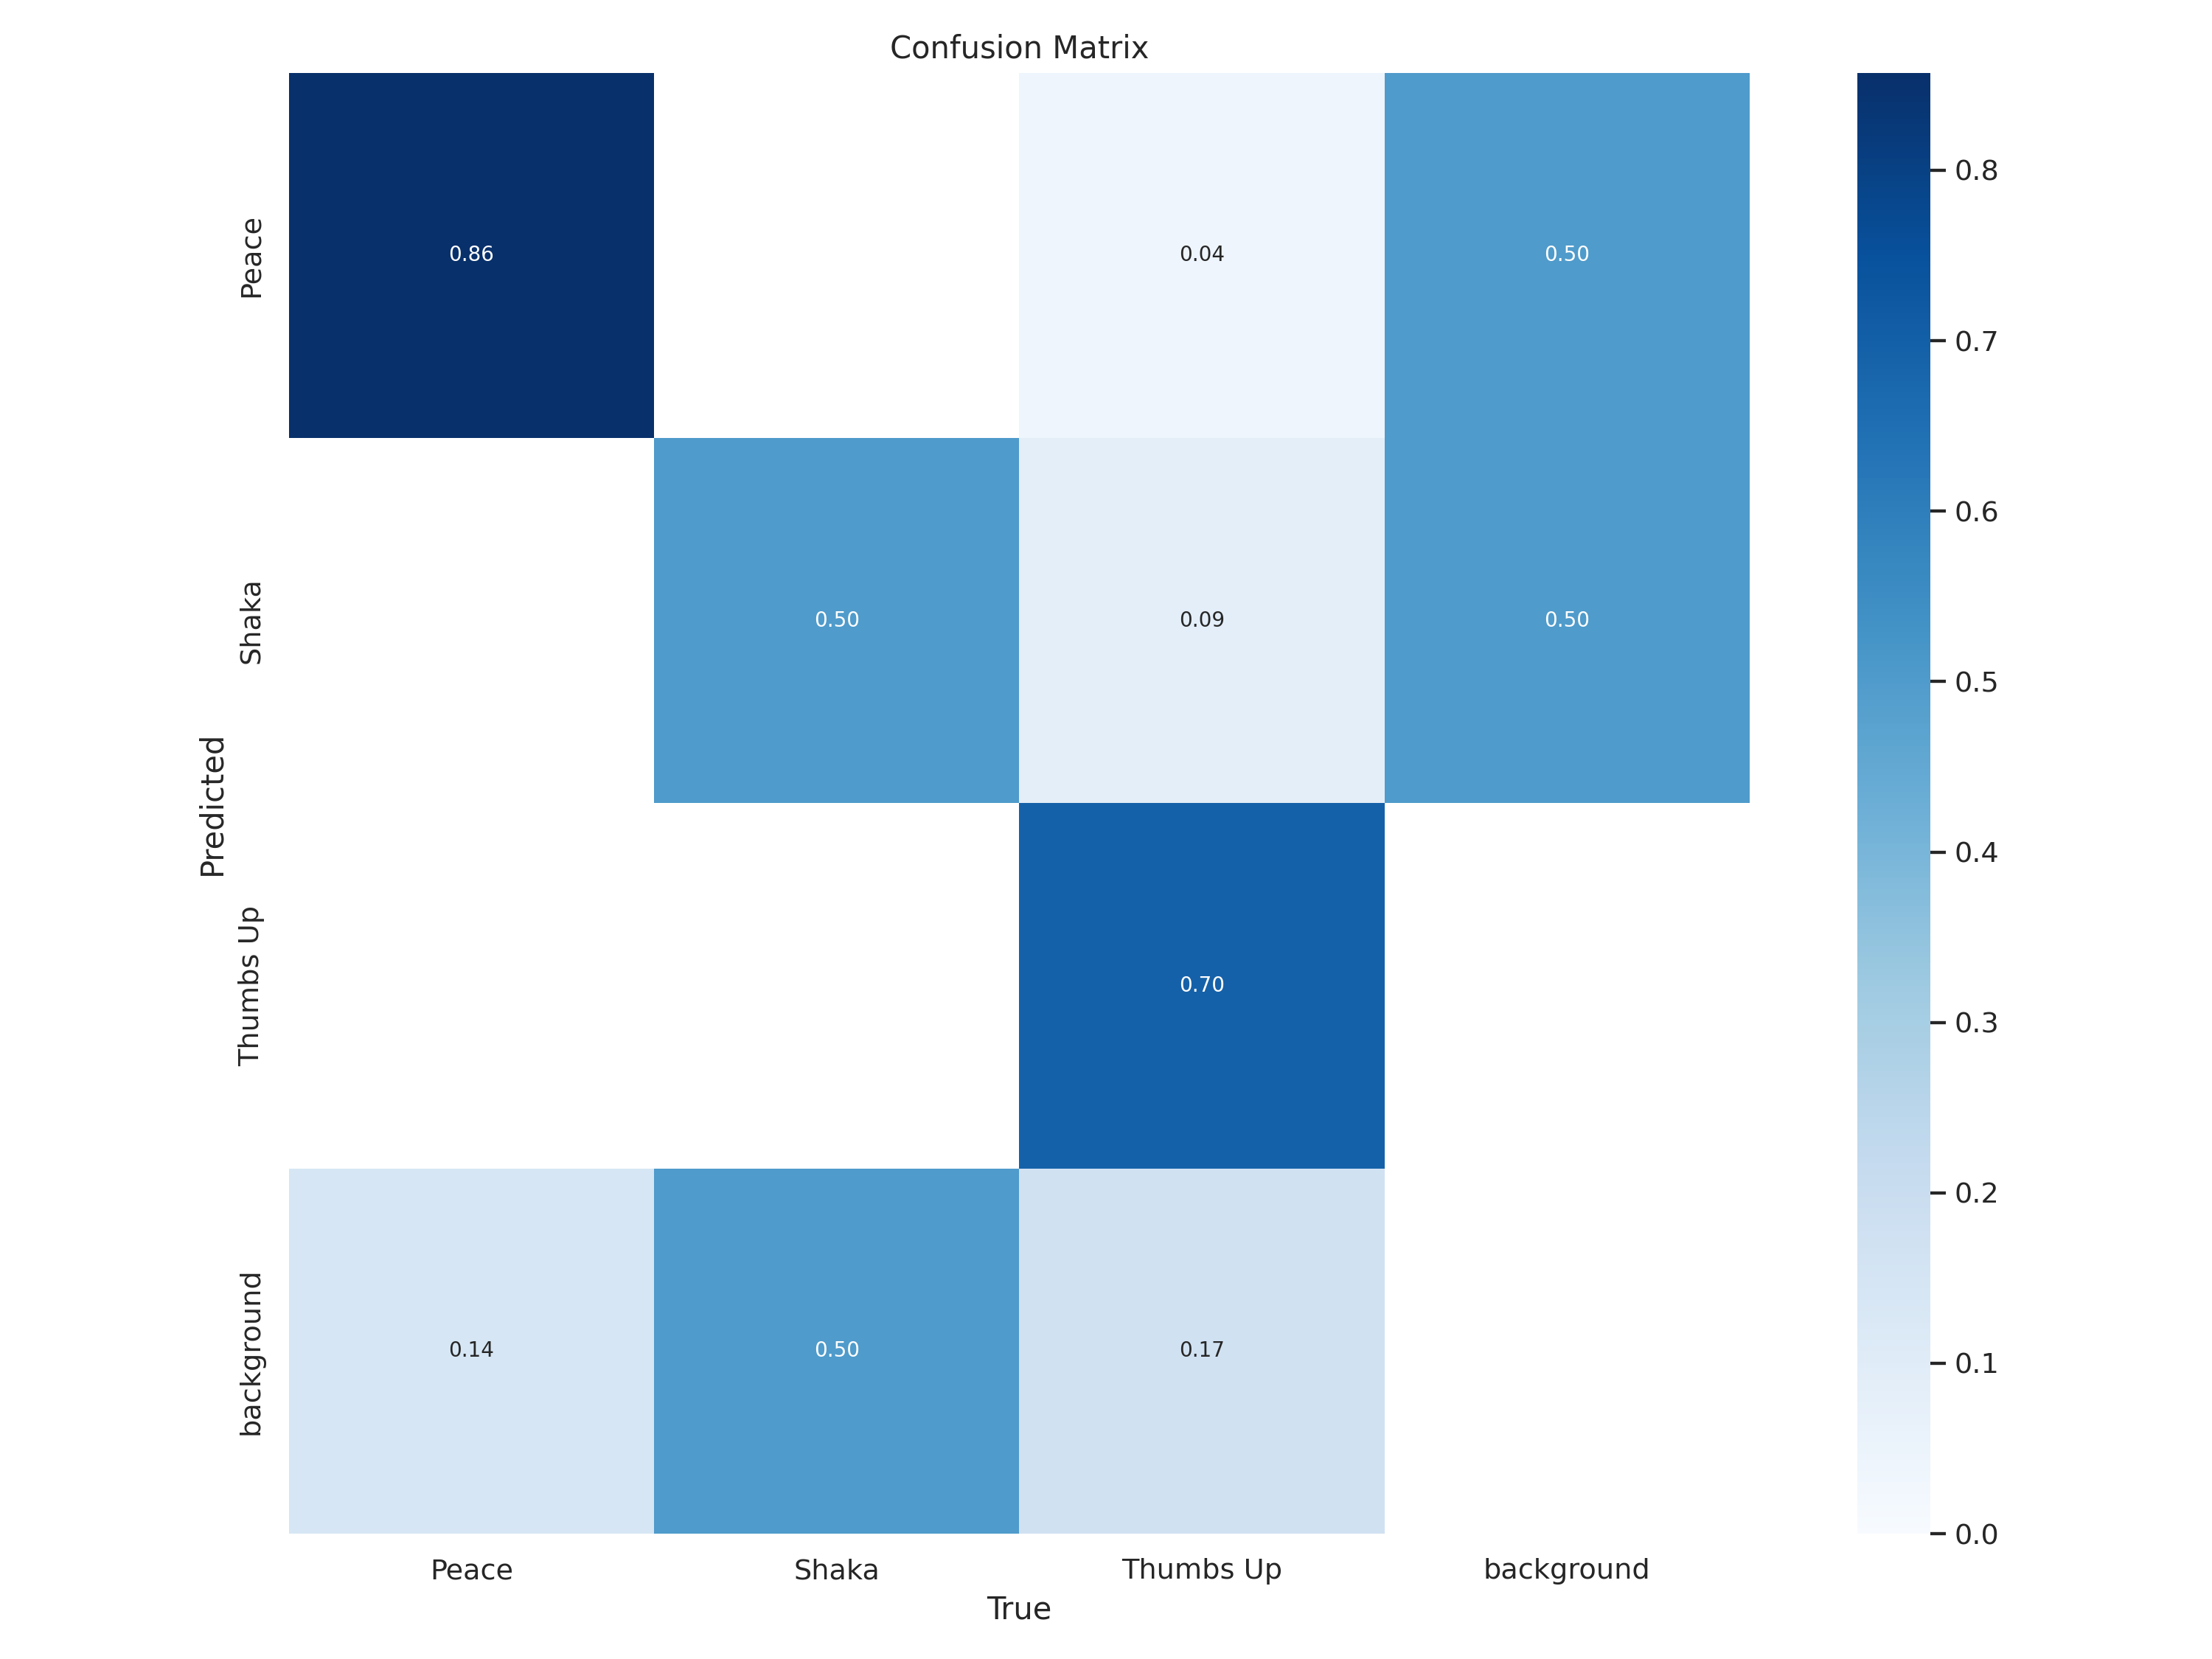

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


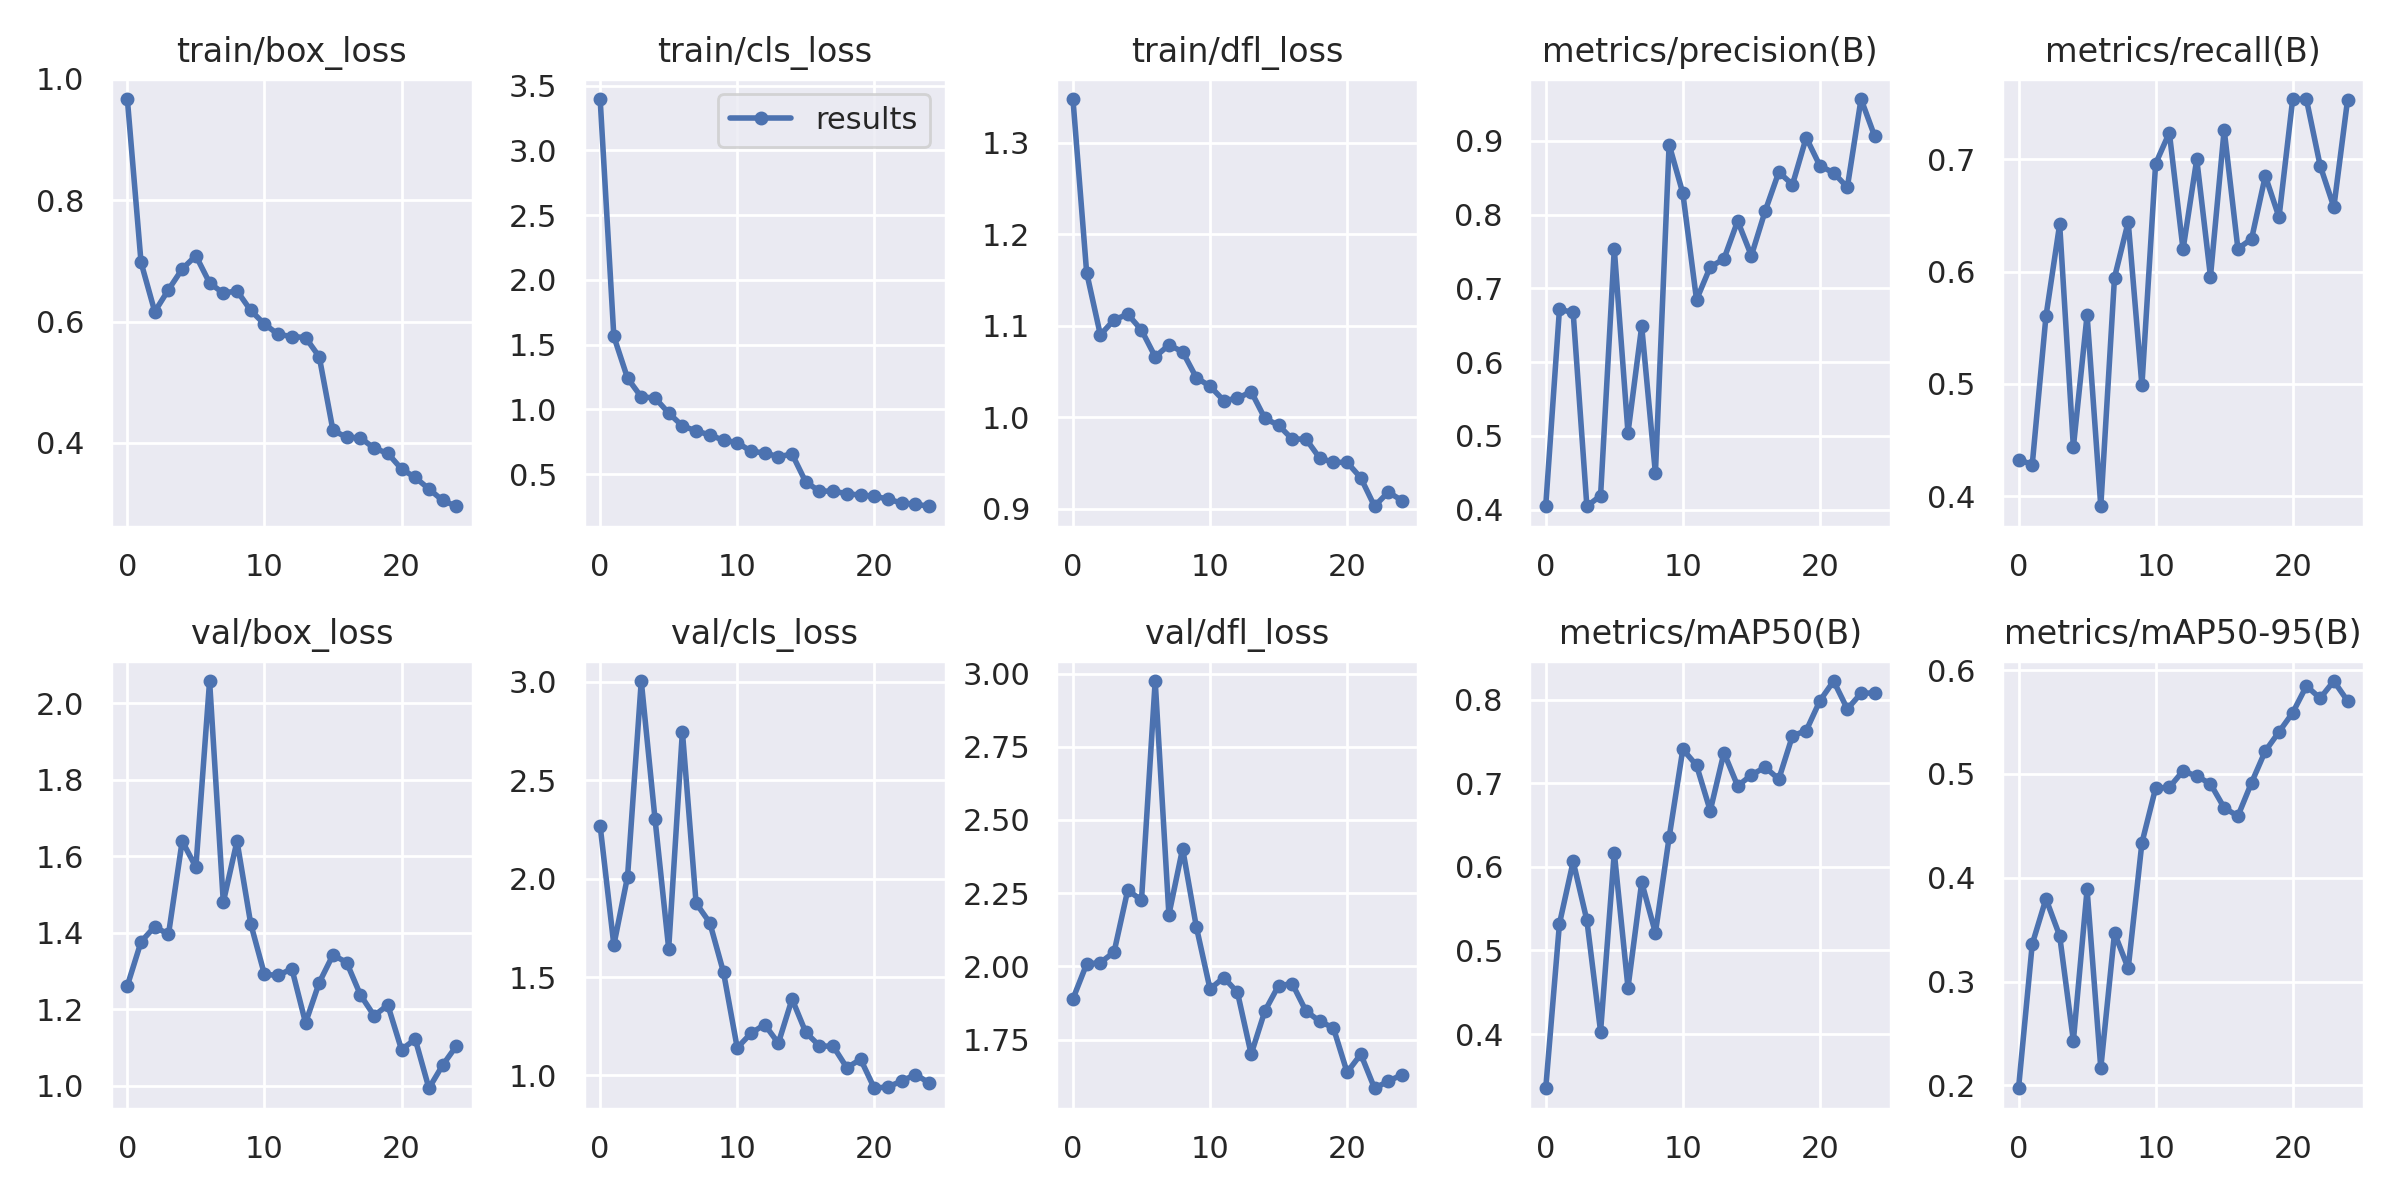

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


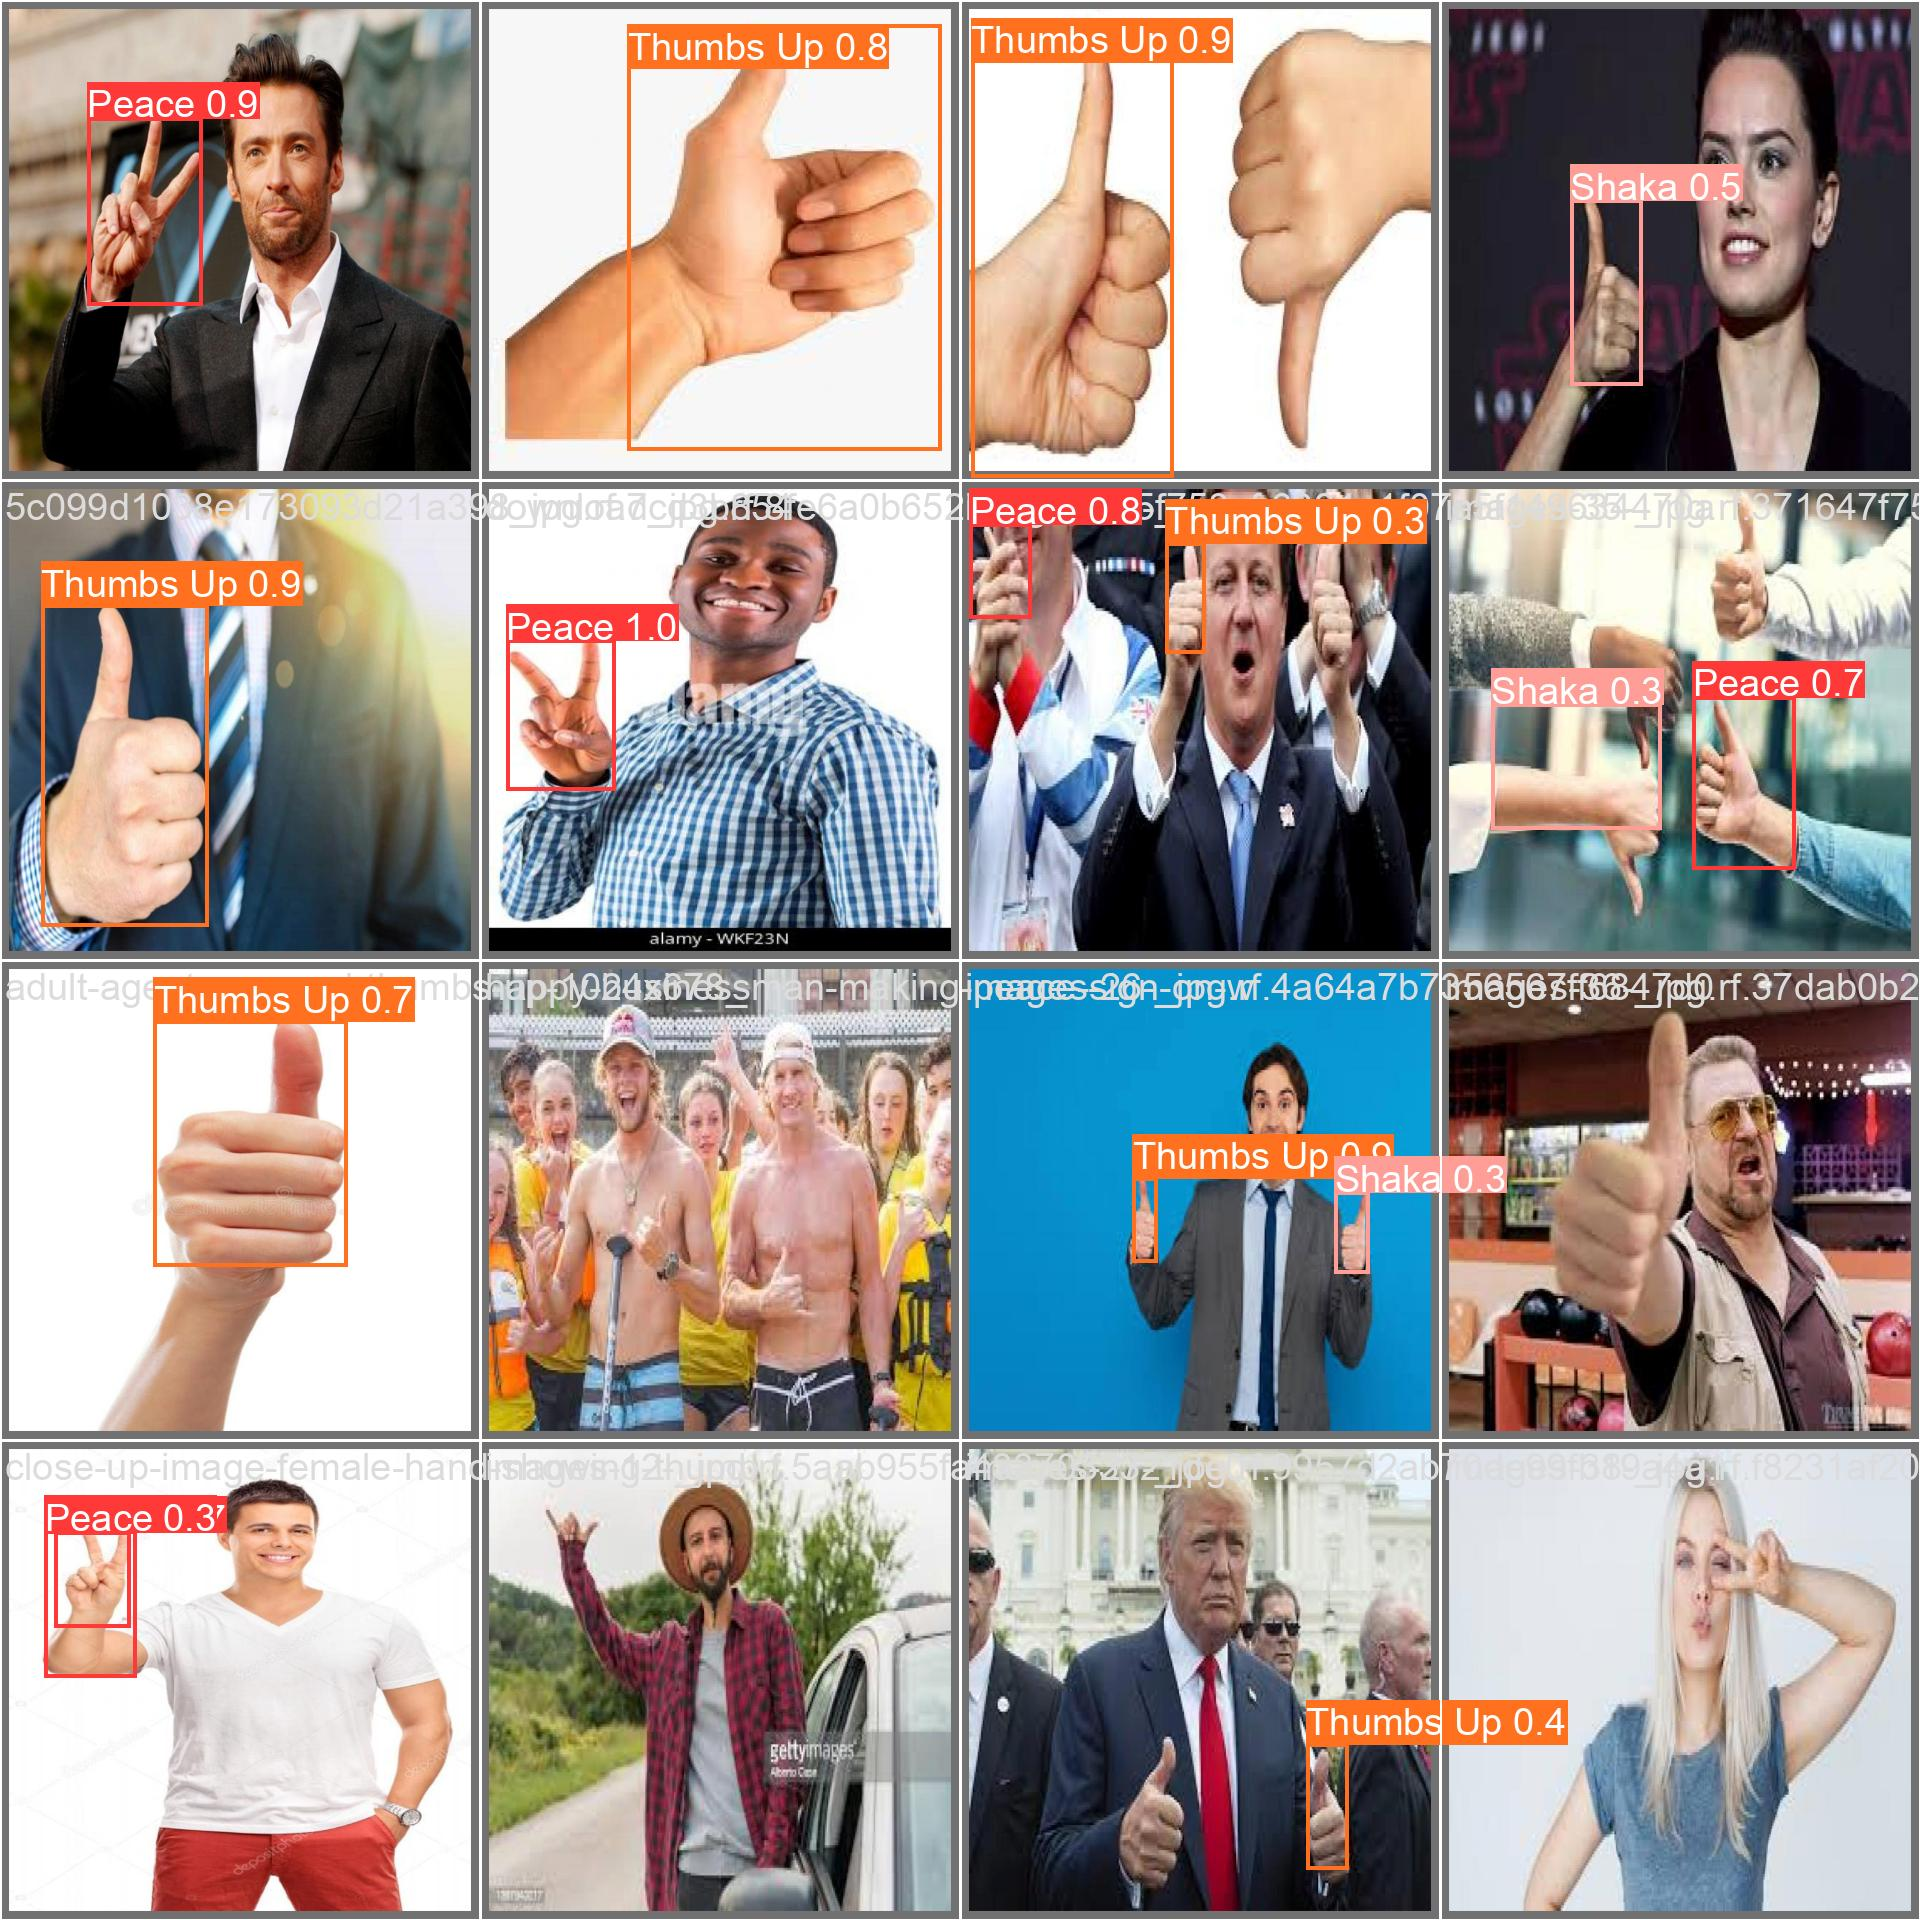

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [31]:
# Validate Custom Model

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2024-01-02 15:42:35.783819: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 15:42:35.783868: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 15:42:35.785195: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-02 15:42:37.385375: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/MidtermQ3-1/valid/labels.cache..

In [32]:
# Inference with Custom Model

%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2024-01-02 15:43:08.878293: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 15:43:08.878339: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 15:43:08.879514: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-02 15:43:09.953497: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/28 /content/datasets/MidtermQ3-1/test/images/800px_COLOU

In [33]:
# Look the results
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [34]:
pip install ultralytics==8.0.196

  Using cached ultralytics-8.0.196-py3-none-any.whl (631 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.20
    Uninstalling ultralytics-8.0.20:
      Successfully uninstalled ultralytics-8.0.20


In [35]:
# Deploy model on Roboflow
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/midterm-ivdzi/midtermq3/1/uploadModel?api_key=9DPI7lNs2AEfPqND41CJ&modelType=yolov8&nocache=true


In [36]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [38]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on WIN_20221212_11_10_24_Pro_jpg.rf.b7905d480144964bcd8e68ffe36d71cf.jpg


TypeError: ignored

In [ ]:
# Deploy Your Model to the Edge
docker pull roboflow/roboflow-inference-server-gpu

import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()